In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from mysql.connector import connect

conn = connect(
    user = 'root',
    password = 'Data@00start',
    host = 'localhost',
    database = 'client_rw'
)

In [3]:
# read the sql files
prod = pd.read_sql ('select * from products', conn)
prod_cat = pd.read_sql('select * from product_category', conn)
prod_cat_map = pd.read_sql('select * from product_category_map', conn)
report = pd.read_sql('select * from customer_profile', conn)
trans_data = pd.read_sql('select * from rw_transaction_data', conn)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25800\2928606731.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  prod = pd.read_sql ('select * from products', conn)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25800\2928606731.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  prod_cat = pd.read_sql('select * from product_category', conn)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25800\2928606731.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  prod_cat_map = pd.read_sql('select * from product_category_map', conn)
C:\User

In [4]:
report.head()

,account_id,reward_point,total_inflow_amount,total_outflow_amount,total_valuechain_amount,total_inflow_count,total_outflow_count,total_valuechain_count,monthly_inflow_amount,monthly_outflow_amount,...,latest_used_product,latest_tran_date,this_month_revenue,monthly_average_lifetime_revenue,total_revenue,product_usage,most_used_product,second_most_used_product,third_most_used_product,run_date
0,1,1574.0,76385.0,70045.0,7650.0,39,31,4,76385.0,70045.0,...,Send Money,2081-01-26,31.0,31.0,31.0,14,Send Money,Fonepay Payment,eSewa to Laxmi Sunrise Bank Ltd.,2024-01-05
1,2,306.0,557075.0,184405.0,344798.0,753,142,400,16005.0,6180.0,...,Fonepay Payment,2081-01-31,4.0,62.0,2727.0,47,NT Prepaid Topup,Send Money,Ncell Topup,2024-01-05
2,3,10.0,18415.0,12400.0,5110.0,6,5,9,18415.0,12400.0,...,NT Prepaid Topup,2081-01-31,16.0,16.0,16.0,8,Ncell Topup,Send Money,Fonepay Payment,2024-01-05
3,4,324.0,6350.0,3050.0,7499.0,4,3,8,6350.0,3050.0,...,Fonepay Payment,2081-01-21,21.0,21.0,21.0,8,Fonepay Payment,Send Money,Electricity,2024-01-05
4,5,929.0,168576.0,100385.0,53911.0,69,24,95,106106.0,88660.0,...,Fonepay Payment,2081-01-31,70.0,28.0,1226.0,37,NT Prepaid Topup,NT Postpaid Topup,Send Money,2024-01-05


## EDA

In [5]:
prod.head()

,module_id,product_id,product_type_id,product_name,product_type_name
0,1,77,29,Ncell Topup via Bank,Card Server Payment
1,1,76,29,SIM TV TOPUP VIA BANK,Card Server Payment
2,1,30,29,NT Topup via Bank,Card Server Payment
3,1,133,29,Wordlink Topup via Bank,Card Server Payment
4,1,89,29,Smart Cell Topup via Bank,Card Server Payment


In [6]:
prod['product_name'].nunique()

386

In [7]:
prod_cat_map.head()

,module_id,product_id,product_type_id,product_name,product_category_id,txn_flow
0,1,670,11,"Siddhartha Sishu Sadan, Ln Chowk, Dhangadhi",33.0,Value Chain
1,2,2545,3,Multipurpose Finance Transfer,NaN,OutFlow
2,2,1444,6,Century Corporate Transfer,NaN,OutFlow
3,2,1008,7,Srijana Corporate Fund Receiver,NaN,OutFlow
4,2,885,10,Pokhara_Convergence,NaN,OutFlow


In [8]:
trans_data.head()

,txn_id,last_modified_date,last_modified_date_bs,created_date,amount,status,module_id,product_id,product_type_id,payer_account_id,receiver_account_id,reward_point,cash_back_amount,revenue_amount,transactor_module_id,time
0,660612529,2023-03-29,2079-12-15,2022-11-23,50.0,1,1,77,29,531,2,0.0,0.00,0.00,4,14:07:40
1,666435422,2022-12-01,2079-08-15,2022-12-01,750.0,1,1,76,29,531,81,0.0,0.00,33.75,4,00:03:41
2,666436001,2022-12-01,2079-08-15,2022-12-01,50.0,1,1,77,29,531,2,0.0,1.38,0.00,4,00:06:20
3,666436068,2022-12-01,2079-08-15,2022-12-01,50.0,1,1,77,29,531,647,0.0,1.38,0.00,4,00:06:32
4,666437220,2022-12-01,2079-08-15,2022-12-01,100.0,1,1,30,29,531,907,0.0,3.90,0.00,4,00:12:51


In [9]:
trans_data.nunique()

txn_id                   11012
last_modified_date           7
last_modified_date_bs        7
created_date                 7
amount                    1360
status                       1
module_id                    2
product_id                 145
product_type_id             23
payer_account_id             7
receiver_account_id        250
reward_point                 9
cash_back_amount           243
revenue_amount              87
transactor_module_id         2
time                      9884
dtype: int64

<AxesSubplot: >

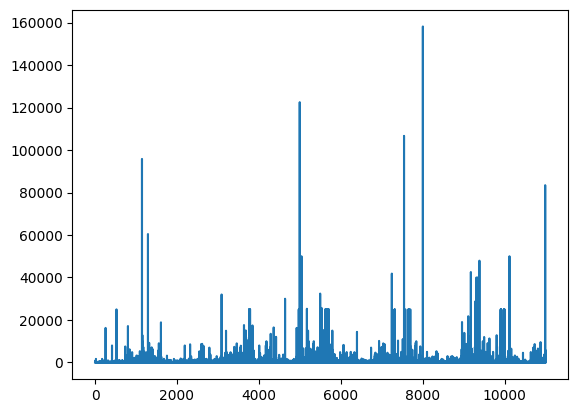

In [10]:
trans_data['amount'].plot()

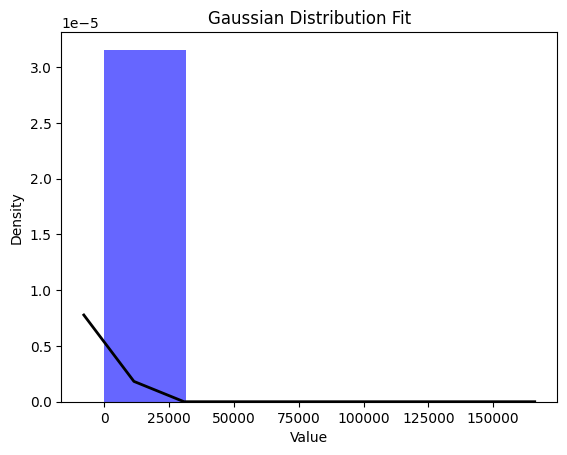

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fit a Gaussian distribution to the data
mu, std = norm.fit(trans_data['amount'])

# Plot the histogram of the data
plt.hist(trans_data['amount'], bins=5, density=True, alpha=0.6, color='b')

# Plot the PDF (Probability Density Function) of the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Gaussian Distribution Fit')

# Show the plot
plt.show()

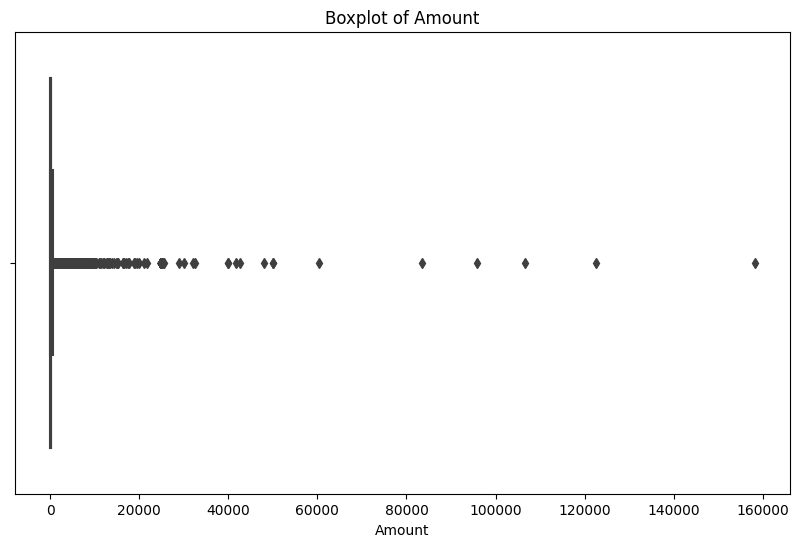

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=trans_data['amount'])
plt.title('Boxplot of Amount')
plt.xlabel('Amount')
plt.show()

In [13]:
merged_df = pd.merge(trans_data, prod_cat_map, on=['module_id', 'product_id', 'product_type_id'], how='inner')

In [14]:
merged_df.head()

,txn_id,last_modified_date,last_modified_date_bs,created_date,amount,status,module_id,product_id,product_type_id,payer_account_id,receiver_account_id,reward_point,cash_back_amount,revenue_amount,transactor_module_id,time,product_name,product_category_id,txn_flow
0,660612529,2023-03-29,2079-12-15,2022-11-23,50.0,1,1,77,29,531,2,0.0,0.00,0.00,4,14:07:40,TOPUP VIA BANK DIRECT,NaN,Value Chain
1,660612529,2023-03-29,2079-12-15,2022-11-23,50.0,1,1,77,29,531,2,0.0,0.00,0.00,4,14:07:40,Ncell Topup via Bank,14.0,Value Chain
2,666435422,2022-12-01,2079-08-15,2022-12-01,750.0,1,1,76,29,531,81,0.0,0.00,33.75,4,00:03:41,SIM TV TOPUP VIA BANK,21.0,Value Chain
3,666436001,2022-12-01,2079-08-15,2022-12-01,50.0,1,1,77,29,531,2,0.0,1.38,0.00,4,00:06:20,TOPUP VIA BANK DIRECT,NaN,Value Chain
4,666436001,2022-12-01,2079-08-15,2022-12-01,50.0,1,1,77,29,531,2,0.0,1.38,0.00,4,00:06:20,Ncell Topup via Bank,14.0,Value Chain


###  Perform monthly and weekly level product wise aggregations of the transactions for each user 

In [24]:
merged_df['last_modified_date'] = pd.to_datetime(merged_df['last_modified_date'])
merged_df['week'] = merged_df['last_modified_date'].dt.month

In [25]:
grouped_data = merged_df.groupby(['payer_account_id', 'month', 'txn_flow'])
monthly_agg = grouped_data.agg({'amount':'sum'})
monthly_agg

amount
payer_account_id month txn_flow              
26               1     InFlow         34340.0
                       OutFlow        51340.0
                       Value Chain    18011.0
                 12    Value Chain      460.0
34               1     InFlow       2133150.0
                       OutFlow      2396770.0
                       Value Chain   246737.0
                 12    InFlow         83200.0
                       OutFlow        88200.0
                       Value Chain     4351.0
56               1     InFlow         15750.0
                       OutFlow       135750.0
                       Value Chain    68204.0
                 12    InFlow          9725.0
                       OutFlow        12125.0
                       Value Chain    18301.0
222              1     Value Chain      240.0
                 12    Value Chain      270.0
471              1     InFlow           700.0
                       OutFlow          700.0
                       Value Chain    18850.0
                 12    Value Chain     3048.0
531              1     Value Chain  1275093.0
                 3     Value Chain      100.0
                 12    Value Chain   600054.0
1056             12    Value Chain      400.0

In [36]:
merged_df['last_modified_date'] = pd.to_datetime(merged_df['last_modified_date'])
merged_df['week'] = merged_df['last_modified_date'].dt.isocalendar().week

In [40]:
grouped_data = merged_df.groupby(['payer_account_id','product_category_id', 'week'])
weekly_agg = grouped_data.agg({'amount': 'sum'})
weekly_agg

amount
payer_account_id product_category_id week          
26               14.0                1       1200.0
                                     48       280.0
                                     52      3200.0
                 19.0                1       4911.0
                 90.0                1      46200.0
...                                             ...
531              21.0                48       750.0
                 75.0                1     172550.0
                                     48     95797.0
                                     52      1850.0
1056             14.0                48       200.0

[65 rows x 1 columns]

In [41]:
final_df = merged_df.groupby('payer_account_id')['reward_point'].sum()
final_df

payer_account_id
26       0.0
34      68.0
56      39.0
222      0.0
471     14.0
531      0.0
1056     8.0
Name: reward_point, dtype: float64

In [43]:
pivot_table = merged_df.pivot_table(index='payer_account_id', columns='txn_flow', values='amount', aggfunc='sum')
pivot_table.reset_index(inplace=True)

pivot_table.fillna(0, inplace=True)
pivot_table.columns = ['payer_account_id', 'Total InFlow Amount', 'Total OutFlow Amount','Total Valuechain Amount']

In [46]:
new_df = pd.DataFrame(pivot_table)
final_df = pd.merge(final_df,new_df,on='payer_account_id')

In [47]:
pivot_table1 = merged_df.pivot_table(index='payer_account_id', columns='txn_flow', values='amount', aggfunc='count')
pivot_table1.reset_index(inplace=True)

# Replace Nan to zero
pivot_table1.fillna(0, inplace=True)

pivot_table1.columns = ['payer_account_id', 'Total InFlow Count', 'Total OutFlow Count','Total Valuechain Count']
final_df = pd.merge(final_df,pd.DataFrame(pivot_table1),on='payer_account_id')

In [48]:
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0


In [16]:
grouped = merged_df.groupby(['payer_account_id', 'month', 'txn_flow', pd.Grouper(key='last_modified_date', freq='M')])
monthly_agg = grouped['amount'].sum().reset_index()
monthly_agg

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25800\3998198643.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = merged_df.groupby(['payer_account_id', 'month', 'txn_flow', pd.Grouper(key='last_modified_date', freq='M')])


,payer_account_id,month,txn_flow,last_modified_date,amount
0,26,1,InFlow,2023-01-31,34340.0
1,26,1,OutFlow,2023-01-31,51340.0
2,26,1,Value Chain,2023-01-31,18011.0
3,26,12,Value Chain,2022-12-31,460.0
4,34,1,InFlow,2023-01-31,2133150.0
5,34,1,OutFlow,2023-01-31,2396770.0
6,34,1,Value Chain,2023-01-31,246737.0
7,34,12,InFlow,2022-12-31,83200.0
8,34,12,OutFlow,2022-12-31,88200.0
9,34,12,Value Chain,2022-12-31,4351.0


In [17]:
grouped1 = merged_df.groupby(['payer_account_id' , 'product_id', 'product_type_id', pd.Grouper(key='last_modified_date', freq='W-MON')])
weekly_agg = grouped1['amount'].mean().reset_index()
weekly_agg

,payer_account_id,product_id,product_type_id,last_modified_date,amount
0,26,2,12,2023-01-02,5000.000000
1,26,2,12,2023-01-09,4260.000000
2,26,4,25,2022-12-05,50.000000
3,26,4,25,2023-01-02,120.000000
4,26,4,25,2023-01-09,116.666667
...,...,...,...,...,...
251,531,332,59,2023-01-09,134.714286
252,531,341,59,2022-12-05,310.000000
253,531,347,59,2022-12-05,394.000000
254,531,347,59,2023-01-09,241.666667


In [18]:
final_df = merged_df.groupby('payer_account_id')['reward_point'].sum()
final_df

payer_account_id
26       0.0
34      68.0
56      39.0
222      0.0
471     14.0
531      0.0
1056     8.0
Name: reward_point, dtype: float64

In [38]:

pivot_table = merged_df.pivot_table(index='payer_account_id', columns='txn_flow', values='amount', aggfunc='count')
pivot_table.reset_index(inplace=True)

# Fill NaN values with 0
pivot_table.fillna(0, inplace=True)
pivot_table.columns = ['payer_account_id', 'Total InFlow Amount', 'Total OutFlow Amount','Total Valuechain Amount']


In [39]:
pivot_df = pd.DataFrame(pivot_table)
pivot_df

,payer_account_id,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount
0,26,12.0,15.0,53.0
1,34,126.0,143.0,80.0
2,56,15.0,22.0,193.0
3,222,0.0,0.0,4.0
4,471,2.0,2.0,116.0
5,531,0.0,0.0,9995.0
6,1056,0.0,0.0,2.0


In [40]:
final_df = pd.merge(final_df,pivot_df,on='payer_account_id')
final_df

,payer_account_id,reward_point,Total InFlow Amount_x,Total OutFlow Amount_x,Total Valuechain Amount_x,Total InFlow Amount_y,Total OutFlow Amount_y,Total Valuechain Amount_y,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount
0,26,0.0,34340.0,51340.0,18471.0,34340.0,51340.0,18471.0,12.0,15.0,53.0
1,34,68.0,2216350.0,2484970.0,251088.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0
2,56,39.0,25475.0,147875.0,86505.0,25475.0,147875.0,86505.0,15.0,22.0,193.0
3,222,0.0,0.0,0.0,510.0,0.0,0.0,510.0,0.0,0.0,4.0
4,471,14.0,700.0,700.0,21898.0,700.0,700.0,21898.0,2.0,2.0,116.0
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,1875247.0,0.0,0.0,9995.0
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,400.0,0.0,0.0,2.0


In [49]:
df = pd.DataFrame(monthly_agg)
pivot_table = df.pivot_table(index='payer_account_id', columns='txn_flow', values='amount', aggfunc='mean')
pivot_table.reset_index(inplace=True)

pivot_table.fillna(0, inplace=True)
pivot_table.columns = ['payer_account_id','monthly_inflow_amount', 'monthly_outflow_amount', 'monthly_valuechain_amount']
newdf1 = pd.DataFrame(pivot_table)
final_df = pd.merge(final_df,newdf1,on='payer_account_id')

In [50]:
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count,monthly_inflow_amount,monthly_outflow_amount,monthly_valuechain_amount
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0,34340.0,51340.0,9235.500000
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0,1108175.0,1242485.0,125544.000000
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0,12737.5,73937.5,43252.500000
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0,0.0,0.0,255.000000
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0,700.0,700.0,10949.000000
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0,0.0,0.0,625082.333333
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0,0.0,0.0,400.000000


In [51]:
monthly_count = df.groupby(['payer_account_id', 'month', 'txn_flow'])['amount'].count().reset_index()
monthly_count = monthly_count.rename(columns={'amount': 'amount_count'})
monthly_count.groupby(['payer_account_id','txn_flow'])['amount_count'].count()

pivot_table2 = monthly_count.pivot_table(index='payer_account_id', columns='txn_flow', values='amount_count', aggfunc='mean')
pivot_table2.reset_index(inplace=True)
pivot_table2.fillna(0, inplace=True)

In [52]:

final_df = pd.merge(final_df, pd.DataFrame(pivot_table2), on='payer_account_id')
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count,monthly_inflow_amount,monthly_outflow_amount,monthly_valuechain_amount,InFlow,OutFlow,Value Chain
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0,34340.0,51340.0,9235.500000,1.0,1.0,1.0
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0,1108175.0,1242485.0,125544.000000,1.0,1.0,1.0
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0,12737.5,73937.5,43252.500000,1.0,1.0,1.0
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0,0.0,0.0,255.000000,0.0,0.0,1.0
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0,700.0,700.0,10949.000000,1.0,1.0,1.0
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0,0.0,0.0,625082.333333,0.0,0.0,1.0
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0,0.0,0.0,400.000000,0.0,0.0,1.0


In [53]:
sorted_df = merged_df.sort_values(by=['last_modified_date', 'time'], ascending=False)
last_prod = sorted_df.groupby('payer_account_id').first()
last_prod = last_prod[['product_name', 'last_modified_date']]
last_prod.reset_index(inplace=True)

df3 = pd.DataFrame(last_prod)
df3.columns = ['payer_account_id','latest_product_used','latest_tran_date']


In [54]:
final_df = pd.merge(final_df,df3,on='payer_account_id')
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count,monthly_inflow_amount,monthly_outflow_amount,monthly_valuechain_amount,InFlow,OutFlow,Value Chain,latest_product_used,latest_tran_date
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0,34340.0,51340.0,9235.500000,1.0,1.0,1.0,Prepaid Topup,2023-01-06
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0,1108175.0,1242485.0,125544.000000,1.0,1.0,1.0,Electricity,2023-01-06
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0,12737.5,73937.5,43252.500000,1.0,1.0,1.0,Electricity,2023-01-06
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0,0.0,0.0,255.000000,0.0,0.0,1.0,Ncell Topup,2023-01-01
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0,700.0,700.0,10949.000000,1.0,1.0,1.0,Prepaid Topup,2023-01-06
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0,0.0,0.0,625082.333333,0.0,0.0,1.0,TOPUP VIA BANK DIRECT,2023-03-29
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0,0.0,0.0,400.000000,0.0,0.0,1.0,Prepaid Topup,2022-12-01


In [55]:
merged_df['last_modified_date'] = pd.to_datetime(merged_df['last_modified_date'])
merged_df['month'] = merged_df['last_modified_date'].dt.month
monthly_revenue = merged_df.groupby(['payer_account_id', 'month']).agg({'cash_back_amount':'sum'})
monthly_revenue_agg = monthly_revenue.groupby('payer_account_id').mean()
df4 = pd.DataFrame(monthly_revenue_agg)
df4.columns = ['monthly_average_lifetime_revenue']

In [56]:
final_df = pd.merge(final_df,df4,on='payer_account_id')
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count,monthly_inflow_amount,monthly_outflow_amount,monthly_valuechain_amount,InFlow,OutFlow,Value Chain,latest_product_used,latest_tran_date,monthly_average_lifetime_revenue
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0,34340.0,51340.0,9235.500000,1.0,1.0,1.0,Prepaid Topup,2023-01-06,136.735
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0,1108175.0,1242485.0,125544.000000,1.0,1.0,1.0,Electricity,2023-01-06,769.590
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0,12737.5,73937.5,43252.500000,1.0,1.0,1.0,Electricity,2023-01-06,359.745
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0,0.0,0.0,255.000000,0.0,0.0,1.0,Ncell Topup,2023-01-01,5.100
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0,700.0,700.0,10949.000000,1.0,1.0,1.0,Prepaid Topup,2023-01-06,284.105
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0,0.0,0.0,625082.333333,0.0,0.0,1.0,TOPUP VIA BANK DIRECT,2023-03-29,14373.110
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0,0.0,0.0,400.000000,0.0,0.0,1.0,Prepaid Topup,2022-12-01,0.000


In [58]:
df5 = merged_df.groupby('payer_account_id').agg({'revenue_amount':'sum'})
df5.columns = ['total_revenue']
final_df = pd.merge(final_df,df5,on='payer_account_id')
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count,monthly_inflow_amount,monthly_outflow_amount,monthly_valuechain_amount,InFlow,OutFlow,Value Chain,latest_product_used,latest_tran_date,monthly_average_lifetime_revenue,total_revenue
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0,34340.0,51340.0,9235.500000,1.0,1.0,1.0,Prepaid Topup,2023-01-06,136.735,40.86
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0,1108175.0,1242485.0,125544.000000,1.0,1.0,1.0,Electricity,2023-01-06,769.590,516.43
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0,12737.5,73937.5,43252.500000,1.0,1.0,1.0,Electricity,2023-01-06,359.745,202.11
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0,0.0,0.0,255.000000,0.0,0.0,1.0,Ncell Topup,2023-01-01,5.100,3.82
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0,700.0,700.0,10949.000000,1.0,1.0,1.0,Prepaid Topup,2023-01-06,284.105,99.78
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0,0.0,0.0,625082.333333,0.0,0.0,1.0,TOPUP VIA BANK DIRECT,2023-03-29,14373.110,2274.04
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0,0.0,0.0,400.000000,0.0,0.0,1.0,Prepaid Topup,2022-12-01,0.000,14.00


In [59]:
df6 = merged_df.groupby('payer_account_id')['product_name'].nunique()
df6 = pd.DataFrame(df6).reset_index()
df6.columns = ['payer_account_id', 'product_usage']
final_df = pd.merge(final_df,df6,on='payer_account_id')
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count,monthly_inflow_amount,monthly_outflow_amount,monthly_valuechain_amount,InFlow,OutFlow,Value Chain,latest_product_used,latest_tran_date,monthly_average_lifetime_revenue,total_revenue,product_usage
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0,34340.0,51340.0,9235.500000,1.0,1.0,1.0,Prepaid Topup,2023-01-06,136.735,40.86,15
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0,1108175.0,1242485.0,125544.000000,1.0,1.0,1.0,Electricity,2023-01-06,769.590,516.43,33
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0,12737.5,73937.5,43252.500000,1.0,1.0,1.0,Electricity,2023-01-06,359.745,202.11,19
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0,0.0,0.0,255.000000,0.0,0.0,1.0,Ncell Topup,2023-01-01,5.100,3.82,1
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0,700.0,700.0,10949.000000,1.0,1.0,1.0,Prepaid Topup,2023-01-06,284.105,99.78,8
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0,0.0,0.0,625082.333333,0.0,0.0,1.0,TOPUP VIA BANK DIRECT,2023-03-29,14373.110,2274.04,88
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0,0.0,0.0,400.000000,0.0,0.0,1.0,Prepaid Topup,2022-12-01,0.000,14.00,2


In [60]:
prod_c = merged_df.groupby(['payer_account_id', 'product_name']).size().reset_index(name='count')
sorted_prod_c = prod_c.sort_values(by=['payer_account_id', 'count'], ascending=[True, False])
top_3prod = sorted_prod_c.groupby('payer_account_id').head(3)
top_3prod

,payer_account_id,product_name,count
4,26,NT Prepaid Topup,18
7,26,Prepaid Topup,18
8,26,Send Money,12
34,34,Send Money,248
19,34,Electricity,21
26,34,NT Prepaid Topup,10
57,56,Ncell Topup,64
50,56,Electricity,52
61,56,Send Money,24
67,222,Ncell Topup,4


In [61]:

pivot_df = top_3prod.pivot_table(index='payer_account_id', columns=top_3prod.groupby('payer_account_id').cumcount() + 1, values='product_name', aggfunc='first')
pivot_df.columns = ['most_used_product', 'second_most_used_product', 'thirdmost_used_product']
pivot_df.reset_index(inplace=True)
df7 = pd.DataFrame(pivot_df)

In [62]:
final_df = pd.merge(final_df,df7,on='payer_account_id')
final_df

,payer_account_id,reward_point,Total InFlow Amount,Total OutFlow Amount,Total Valuechain Amount,Total InFlow Count,Total OutFlow Count,Total Valuechain Count,monthly_inflow_amount,monthly_outflow_amount,...,OutFlow,Value Chain,latest_product_used,latest_tran_date,monthly_average_lifetime_revenue,total_revenue,product_usage,most_used_product,second_most_used_product,thirdmost_used_product
0,26,0.0,34340.0,51340.0,18471.0,12.0,15.0,53.0,34340.0,51340.0,...,1.0,1.0,Prepaid Topup,2023-01-06,136.735,40.86,15,NT Prepaid Topup,Prepaid Topup,Send Money
1,34,68.0,2216350.0,2484970.0,251088.0,126.0,143.0,80.0,1108175.0,1242485.0,...,1.0,1.0,Electricity,2023-01-06,769.590,516.43,33,Send Money,Electricity,NT Prepaid Topup
2,56,39.0,25475.0,147875.0,86505.0,15.0,22.0,193.0,12737.5,73937.5,...,1.0,1.0,Electricity,2023-01-06,359.745,202.11,19,Ncell Topup,Electricity,Send Money
3,222,0.0,0.0,0.0,510.0,0.0,0.0,4.0,0.0,0.0,...,0.0,1.0,Ncell Topup,2023-01-01,5.100,3.82,1,Ncell Topup,NaN,NaN
4,471,14.0,700.0,700.0,21898.0,2.0,2.0,116.0,700.0,700.0,...,1.0,1.0,Prepaid Topup,2023-01-06,284.105,99.78,8,Ncell Topup,NT Prepaid Topup,Prepaid Topup
5,531,0.0,0.0,0.0,1875247.0,0.0,0.0,9995.0,0.0,0.0,...,0.0,1.0,TOPUP VIA BANK DIRECT,2023-03-29,14373.110,2274.04,88,NT Topup via Bank,Ncell Topup via Bank,TOPUP VIA BANK DIRECT
6,1056,8.0,0.0,0.0,400.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,Prepaid Topup,2022-12-01,0.000,14.00,2,NT Prepaid Topup,Prepaid Topup,NaN
